In [1]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image
import os
import matplotlib.pyplot as plt
import cv2

In [2]:
image_dims = 128
batch_size = 64

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(image_dims, image_dims, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

# The number of nodes in the Dense layer should match the output of the Flatten layer
model.add(Dense(128, activation='relu'))

model.add(Dense(1, activation='sigmoid'))


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0

In [5]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [6]:
import os
from keras.preprocessing.image import ImageDataGenerator

# Define your image dimensions and batch size
image_dims = 224
batch_size = 32

# Update the input path using a raw string
input_path = r'C:\Users\ARNAB\Desktop\LungsXray\LungsXray\chest_xray'

# Generate Training data:
training_data_generator = ImageDataGenerator(rescale=1./255,
                                              shear_range=0.2,
                                              zoom_range=0.2,
                                              horizontal_flip=True)

# Use os.path.join to concatenate paths
training_gen = training_data_generator.flow_from_directory(directory=os.path.join(input_path, 'train'),
                                                            target_size=(image_dims, image_dims),
                                                            batch_size=batch_size,
                                                            class_mode='binary')


Found 5216 images belonging to 2 classes.


In [7]:
# Generate Validation data:
validation_data_generator = ImageDataGenerator(rescale=1./255)

# Use os.path.join to concatenate paths
validation_gen = validation_data_generator.flow_from_directory(directory=os.path.join(input_path, 'val'),
                                                                target_size=(image_dims, image_dims),
                                                                batch_size=batch_size,
                                                                class_mode='binary')


Found 16 images belonging to 2 classes.


In [8]:
# Generate Validation data:
validation_data_generator = ImageDataGenerator(rescale=1./255)

validation_gen = validation_data_generator.flow_from_directory(directory=os.path.join(input_path, 'val'),
                                                               target_size=(image_dims, image_dims),
                                                               batch_size=batch_size,
                                                               class_mode='binary')


Found 16 images belonging to 2 classes.


In [10]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image dimensions and batch size
image_dims = 224
batch_size = 32

# Define the input path
input_path = r'C:\Users\ARNAB\Desktop\LungsXray\LungsXray\chest_xray'

# Create the model
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(image_dims, image_dims, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Create data generators
training_data_generator = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
training_gen = training_data_generator.flow_from_directory(directory=os.path.join(input_path, 'train'),
                                                           target_size=(image_dims, image_dims),
                                                           batch_size=batch_size,
                                                           class_mode='binary')
validation_data_generator = ImageDataGenerator(rescale=1./255)
validation_gen = validation_data_generator.flow_from_directory(directory=os.path.join(input_path, 'val'),
                                                               target_size=(image_dims, image_dims),
                                                               batch_size=batch_size,
                                                               class_mode='binary')
test_data_generator = ImageDataGenerator(rescale=1./255)
test_gen = test_data_generator.flow_from_directory(directory=os.path.join(input_path, 'test'),
                                                   target_size=(image_dims, image_dims),
                                                   batch_size=128,
                                                   class_mode='binary')

# Train the model
epochs = 10
history = model.fit_generator(training_gen,
                              steps_per_epoch=10,
                              epochs=epochs,
                              validation_data=validation_gen,
                              validation_steps=validation_gen.samples)

# Evaluate the model on test data
eval_result = model.evaluate_generator(test_gen)
print('Loss rate at evaluation data:', eval_result[0])
print('Accuracy rate at evaluation data:', eval_result[1])


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


C:\Users\ARNAB\AppData\Local\Temp\ipykernel_27812\2964564914.py:49: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(training_gen,


Epoch 1/10
10/10 [==============================] - 18s 1s/step - loss: 0.7286 - accuracy: 0.6469 - val_loss: 0.7012 - val_accuracy: 0.5000
Epoch 2/10
10/10 [==============================] - 14s 1s/step - loss: 0.5806 - accuracy: 0.7563
Epoch 3/10
10/10 [==============================] - 14s 1s/step - loss: 0.5760 - accuracy: 0.7250
Epoch 4/10
10/10 [==============================] - 14s 1s/step - loss: 0.4321 - accuracy: 0.8344
Epoch 5/10
10/10 [==============================] - 14s 1s/step - loss: 0.3316 - accuracy: 0.8625
Epoch 6/10
10/10 [==============================] - 15s 1s/step - loss: 0.2812 - accuracy: 0.8781
Epoch 7/10
10/10 [==============================] - 16s 2s/step - loss: 0.2687 - accuracy: 0.8813
Epoch 8/10
10/10 [==============================] - 16s 2s/step - loss: 0.2814 - accuracy: 0.8719
Epoch 9/10
10/10 [==============================] - 16s 2s/step - loss: 0.2600 - accuracy: 0.8906
Epoch 10/10
10/10 [==============================] - 15s 2s/step - loss: 0.2

C:\Users\ARNAB\AppData\Local\Temp\ipykernel_27812\2964564914.py:56: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  eval_result = model.evaluate_generator(test_gen)


Loss rate at evaluation data: 0.706682562828064
Accuracy rate at evaluation data: 0.7532051205635071


In [11]:
epochs = 10
history = model.fit_generator(training_gen,
             steps_per_epoch= 10,
             epochs = epochs,
             validation_data=validation_gen,
             validation_steps= validation_gen.samples)

C:\Users\ARNAB\AppData\Local\Temp\ipykernel_27812\3023415710.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(training_gen,


Epoch 1/10
10/10 [==============================] - 19s 2s/step - loss: 0.2586 - accuracy: 0.9062 - val_loss: 0.6719 - val_accuracy: 0.6250
Epoch 2/10
10/10 [==============================] - 17s 2s/step - loss: 0.3235 - accuracy: 0.8719
Epoch 3/10
10/10 [==============================] - 15s 2s/step - loss: 0.2965 - accuracy: 0.8594
Epoch 4/10
10/10 [==============================] - 16s 2s/step - loss: 0.2559 - accuracy: 0.9031
Epoch 5/10
10/10 [==============================] - 16s 2s/step - loss: 0.2454 - accuracy: 0.8781
Epoch 6/10
10/10 [==============================] - 14s 1s/step - loss: 0.2226 - accuracy: 0.9031
Epoch 7/10
10/10 [==============================] - 15s 1s/step - loss: 0.2320 - accuracy: 0.9031
Epoch 8/10
10/10 [==============================] - 14s 1s/step - loss: 0.2738 - accuracy: 0.8781
Epoch 9/10
10/10 [==============================] - 15s 1s/step - loss: 0.2600 - accuracy: 0.8875
Epoch 10/10
10/10 [==============================] - 15s 1s/step - loss: 0.2

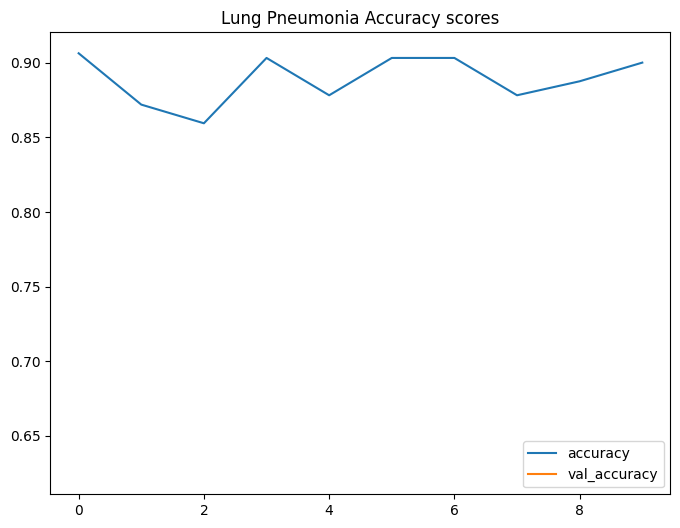

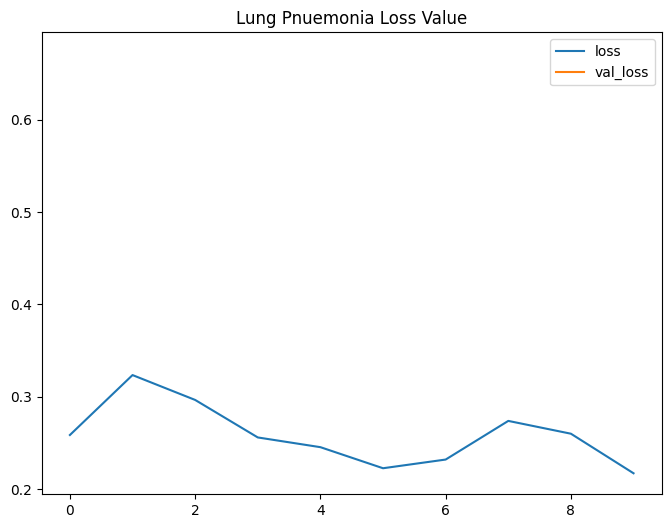

In [12]:
plt.figure(figsize=(8,6))
plt.title('Lung Pneumonia Accuracy scores')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

plt.figure(figsize=(8,6))
plt.title('Lung Pnuemonia Loss Value')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()